Partie IA

Imports

In [32]:
# Importation des bibliothèques nécessaires
import seaborn as sns  # Pour la visualisation statistique
import matplotlib.pyplot as plt  # Pour créer des graphiques
import pandas as pd  # Pour manipuler les données sous forme de DataFrame
import numpy as np  # Pour les calculs numériques
import plotly.express as px  # Pour les visualisations interactives
from IPython.display import display, HTML  # Pour afficher du HTML dans un notebook Jupyter
import warnings  # Pour gérer les avertissements
from colorama import Fore, Style  # Pour styliser le texte dans la console avec des couleurs

# Importation des modules de Scikit-learn pour la transformation des colonnes, pipelines, modèles et évaluation
from sklearn.compose import ColumnTransformer  # Pour appliquer des transformations différentes sur les colonnes
from sklearn.pipeline import Pipeline  # Pour créer des pipelines de transformations et de modèles
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, OneHotEncoder  # Pour le prétraitement des données
from sklearn.ensemble import RandomForestClassifier  # Modèle de forêt aléatoire
from sklearn.tree import DecisionTreeClassifier  # Modèle d'arbre de décision
from sklearn.svm import SVC  # Modèle de machine à vecteurs de support
from sklearn.neighbors import KNeighborsClassifier  # Modèle des k plus proches voisins
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV  # Pour la division des données et la recherche des hyperparamètres
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score  # Pour évaluer les performances du modèle
from scipy.stats import randint  # Pour générer des valeurs aléatoires
from catboost import CatBoostClassifier  # Classifieur CatBoost
from lightgbm import LGBMClassifier  # Classifieur LightGBM
import lightgbm as lgb  # Pour d'autres fonctions LightGBM
from sklearn.preprocessing import LabelEncoder  # Pour encoder les étiquettes catégorielles

# Ignorer certains avertissements
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

In [33]:
df_tr = pd.read_csv(r'C:\Users\colin\Documents\ESEO\E5\docsPFE\creditcard_2023.csv')

In [34]:
# Fonction qui génère un titre stylisé en HTML avec du texte et des couleurs personnalisées
def styled_heading(text, background_color='#14adc6', text_color='white'):
    # Retourne une chaîne de caractères HTML qui stylise un paragraphe avec les paramètres donnés
    return f"""
    <p style="
        background-color: {background_color};  # Couleur de fond
        font-family: Pacifico, cursive;        # Police de caractère stylée
        font-size: 150%;                       # Taille du texte agrandie (150%)
        color: {text_color};                   # Couleur du texte
        text-align: center;                    # Texte centré
        border-radius: 10px;                   # Bords arrondis
        padding: 10px;                         # Espace intérieur autour du texte
        font-weight: normal;                   # Poids de la police (normal)
        box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);  # Ombre autour du paragraphe
        width: fit-content;                    # Ajustement de la largeur au contenu
        margin: 0 auto;                        # Centrage du bloc sur la page
    ">
        {text}  # Insertion du texte dans l'élément HTML
    </p>
    """

# Fonction qui stylise un tableau de données (DataFrame) en HTML avec des en-têtes colorés
def style_table(df):
    # Applique des styles personnalisés à la table : en-têtes en blanc et bleu, texte centré, cache l'index
    styled_df = df.style.set_table_styles([
        {"selector": "th", "props": [("color", "white"), ("background-color", "#14adc6")]}
    ]).set_properties(**{"text-align": "center"}).hide(axis="index")
    # Retourne le DataFrame stylisé en HTML
    return styled_df.to_html()

# Fonction qui affiche une analyse de base d'un dataset (jeu de données)
def print_dataset_analysis(train_dataset, n_top=5, heading_color='#14adc6', text_color='white'):
    # Création et affichage d'un titre pour l'aperçu des données
    train_heading = styled_heading(f"Basic Overview of Data", heading_color, text_color)
    display(HTML(train_heading))
    # Affichage des premières lignes du dataset sous forme de tableau HTML
    display(HTML(style_table(train_dataset.head(n_top))))

    # Création et affichage d'un titre pour le résumé statistique des données
    summary_heading = styled_heading("Data Summary", heading_color, text_color)
    display(HTML(summary_heading))
    # Affichage des statistiques descriptives du dataset
    display(HTML(style_table(train_dataset.describe())))

    # Création et affichage d'un titre pour la section sur les valeurs nulles
    null_heading = styled_heading("Null Values in Data", heading_color, text_color)
    train_null_count = train_dataset.isnull().sum()  # Calcul des valeurs nulles
    display(HTML(null_heading))
    # Si aucune valeur nulle n'est trouvée, affichage d'un message correspondant
    if train_null_count.sum() == 0:
        display(HTML("<p>No null values in the dataset.</p>"))
    else:
        # Sinon, affichage des colonnes avec des valeurs nulles
        display(HTML("<h3>Null Values:</h3>"))
        display(HTML(style_table(train_null_count[train_null_count > 0].to_frame())))
        display(HTML("<p>These are the null values.</p>"))

    # Création et affichage d'un titre pour la section sur les valeurs dupliquées
    duplicate_heading = styled_heading("Duplicate Values in Data", heading_color, text_color)
    train_duplicates = train_dataset.duplicated().sum()  # Calcul du nombre de lignes dupliquées
    display(HTML(duplicate_heading))
    # Affichage du nombre de lignes dupliquées trouvées
    display(HTML("<h3>Duplicates:</h3>"))
    display(HTML(f"<p>{train_duplicates} duplicate rows found.</p>"))

    # Création et affichage d'un titre pour les dimensions du dataset
    shape_heading = styled_heading("Data Shape", heading_color, text_color)
    display(HTML(shape_heading))
    # Affichage du nombre de lignes et de colonnes dans le dataset
    display(HTML("<h3>Shape:</h3>"))
    display(HTML(f"<p>Rows: {train_dataset.shape[0]}, Columns: {train_dataset.shape[1]}</p>"))

# Fonction qui affiche les valeurs uniques des colonnes d'un dataset
def print_unique_values(train_dataset, heading_color='#14adc6', text_color='white'):
    # Création et affichage d'un titre pour la section des valeurs uniques
    unique_values_heading = styled_heading("Unique Values in Data", heading_color, text_color)
    display(HTML(unique_values_heading))
    # Création d'un tableau avec le nom des colonnes, le type de données, et les premières valeurs uniques
    unique_values_table = pd.DataFrame({
        'Column Name': train_dataset.columns,
        'Data Type': [train_dataset[col].dtype for col in train_dataset.columns],
        'Unique Values': [', '.join(map(str, train_dataset[col].unique()[:7])) for col in train_dataset.columns]
    })
    # Affichage du tableau des valeurs uniques sous forme HTML
    display(HTML(style_table(unique_values_table)))

# Exemple d'utilisation avec un dataset 'df_tr'
print_dataset_analysis(df_tr, n_top=5, heading_color='#14adc6', text_color='white')
print_unique_values(df_tr, heading_color='#14adc6', text_color='white')


id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.100000,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.370000,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.540000,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.440000,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.970000,0


id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000
284314.500000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,12041.957635,0.500000
164149.486122,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,6919.644449,0.500000
0.000000,-3.495584,-49.966572,-3.183760,-4.951222,-9.952786,-21.111108,-4.351839,-10.756342,-3.751919,-3.163276,-5.954723,-2.020399,-5.955227,-2.107417,-3.861813,-2.214513,-2.484938,-2.421949,-7.804988,-78.147839,-19.382523,-7.734798,-30.295450,-4.067968,-13.612633,-8.226969,-10.498633,-39.035243,50.010000,0.000000
142157.250000,-0.565286,-0.486678,-0.649299,-0.656020,-0.293496,-0.445871,-0.283533,-0.192257,-0.568745,-0.590101,-0.701449,-0.831133,-0.696667,-0.873206,-0.621249,-0.716265,-0.619491,-0.556046,-0.565308,-0.350240,-0.166441,-0.490489,-0.237629,-0.651580,-0.554148,-0.631895,-0.304961,-0.231878,6054.892500,0.000000
284314.500000,-0.093638,-0.135894,0.000353,-0.073762,0.081088,0.078718,0.233366,-0.114524,0.092526,0.262614,-0.041050,0.162052,0.017608,0.230501,-0.039256,0.134026,0.271641,0.087294,-0.025979,-0.123378,-0.037431,-0.027329,-0.059689,0.015901,-0.008193,-0.011892,-0.172911,-0.013930,12030.150000,0.500000
426471.750000,0.832658,0.343555,0.628538,0.707005,0.439737,0.497788,0.525955,0.047299,0.559262,0.592460,0.747773,0.744672,0.685605,0.751822,0.665406,0.655606,0.518224,0.544389,0.560116,0.248216,0.147979,0.463882,0.155715,0.700737,0.550015,0.672888,0.334023,0.409590,18036.330000,1.000000
568629.000000,2.229046,4.361865,14.125834,3.201536,42.716891,26.168402,217.873038,5.958040,20.270062,31.722709,2.513573,17.913556,7.187486,19.169544,14.532202,46.652906,6.994124,6.783716,3.831672,29.872812,8.087080,12.632511,31.707627,12.965639,14.621509,5.623285,113.231093,77.255937,24039.930000,1.000000


Column Name,Data Type,Unique Values
id,int64,"0, 1, 2, 3, 4, 5, 6"
V1,float64,"-0.2606478048943981, 0.9850997342386376, -0.2602716127429705, -0.1521521019135671, -0.2068195207397724, 0.0253022918437197, 1.016481733774662"
V2,float64,"-0.4696484500536342, -0.3560450929163436, -0.949384606645412, -0.508958707673651, -0.1652802037771797, -0.1405138106986785, -0.3971805392710764"
V3,float64,"2.496266082631564, 0.5580563509382045, 1.7285377761514875, 1.746840058804548, 1.5270526784614766, 1.1911377729432049, 0.4978676895018615"
V4,float64,"-0.0837239126781463, -0.4296539034065106, -0.4579862888424837, -1.090177941714601, -0.4482926629585126, -0.7079788118561594, -0.1444627937175796"
V5,float64,"0.1296812361545678, 0.2771402629466986, 0.0740616543492221, 0.2494857726542817, 0.1061251141654366, 0.4304903210757426, 0.3310218239728978"
V6,float64,"0.7328982498449426, 0.4286045153379263, 1.4194811432767418, 1.143312263314309, 0.5305488615008258, 0.458973191695661, 0.6292427694008561"
V7,float64,"0.5190136179018007, 0.4064660422512956, 0.7435110747693963, 0.5182685727677246, 0.658849134344094, 0.611049586735272, 0.4312624487933091"
V8,float64,"-0.1300060475886773, -0.1331182741764908, -0.0955760133714609, -0.0651299167095495, -0.2126600114747583, -0.0926286061215454, -0.1340074521768929"
V9,float64,"0.7271592691096374, 0.3474518951767279, -0.2612966191422005, -0.2056976045189998, 1.0499208392737625, 0.1808113568188648, 0.7961590291922901"


In [ ]:
# Fonction qui crée des sous-graphiques pour afficher la distribution de colonnes d'un DataFrame en fonction d'une variable catégorielle (hue)
def create_subplots(df, columns, hue, theme_style, theme_rc, palette, figsize=(15, 10)):
    # Configuration du thème graphique avec le style et les paramètres personnalisés
    sns.set_theme(style=theme_style, rc=theme_rc)
    
    # Calcul du nombre de colonnes à afficher (excluant la colonne utilisée pour hue)
    num_columns = len(columns) - 1  # On soustrait 1 pour exclure la colonne hue
    # Calcul du nombre de lignes nécessaires pour les sous-graphiques, avec 3 colonnes par ligne
    num_rows = (num_columns + 2) // 3  # Le +2 garantit qu'on arrondit correctement vers le haut

    # Création de la figure et des axes pour les sous-graphiques avec la taille donnée
    fig, axes = plt.subplots(num_rows, 3, figsize=figsize)
    axes = axes.flatten()  # Aplatit les axes dans une liste pour un accès facile
    
    plot_index = 0  # Indice pour suivre quel graphique est en cours de création
    # Boucle à travers chaque colonne spécifiée
    for col in columns:
        # Si la colonne est la même que la colonne hue, on la saute
        if col == hue:
            continue

        # Création d'un histogramme avec ligne de densité (KDE) pour la colonne courante
        sns.histplot(data=df, x=col, hue=hue, bins=40, palette=palette, edgecolor='white', kde=True, ax=axes[plot_index])
        
        # Calcul de la moyenne et de la médiane pour la colonne actuelle
        mean_value = df[col].mean()
        median_value = df[col].median()
        
        # Ajout d'une ligne verticale indiquant la moyenne
        axes[plot_index].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
        # Ajout d'une ligne verticale indiquant la médiane
        axes[plot_index].axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
        
        # Définition du titre, des labels des axes et affichage de la légende pour le graphique courant
        axes[plot_index].set_title(f'Distribution of {col} with Mean and Median')
        axes[plot_index].set_xlabel(col)
        axes[plot_index].set_ylabel('Count')
        axes[plot_index].legend()
        
        # Incrémentation de l'indice de graphique
        plot_index += 1
    
    # Suppression des axes supplémentaires s'ils ne sont pas utilisés (cas où le nombre de colonnes n'est pas un multiple de 3)
    for j in range(plot_index, len(axes)):
        fig.delaxes(axes[j])  # Supprime les axes inutilisés
    
    # Ajustement de la mise en page pour éviter les chevauchements
    plt.tight_layout()
    # Affichage de la figure complète avec tous les sous-graphiques
    plt.show()

# Exemple d'utilisation
columns = df_tr.columns.to_list()  # Récupération de la liste des colonnes du DataFrame
palette = sns.color_palette("magma")  # Définition d'une palette de couleurs spécifique

# Création des sous-graphiques pour le DataFrame 'df_tr', en utilisant 'Class' comme hue
create_subplots(df=df_tr, columns=columns, hue='Class', 
                theme_style='whitegrid', theme_rc={"axes.facecolor": "#5fa1bc"}, 
                palette=palette, figsize=(20, 60))


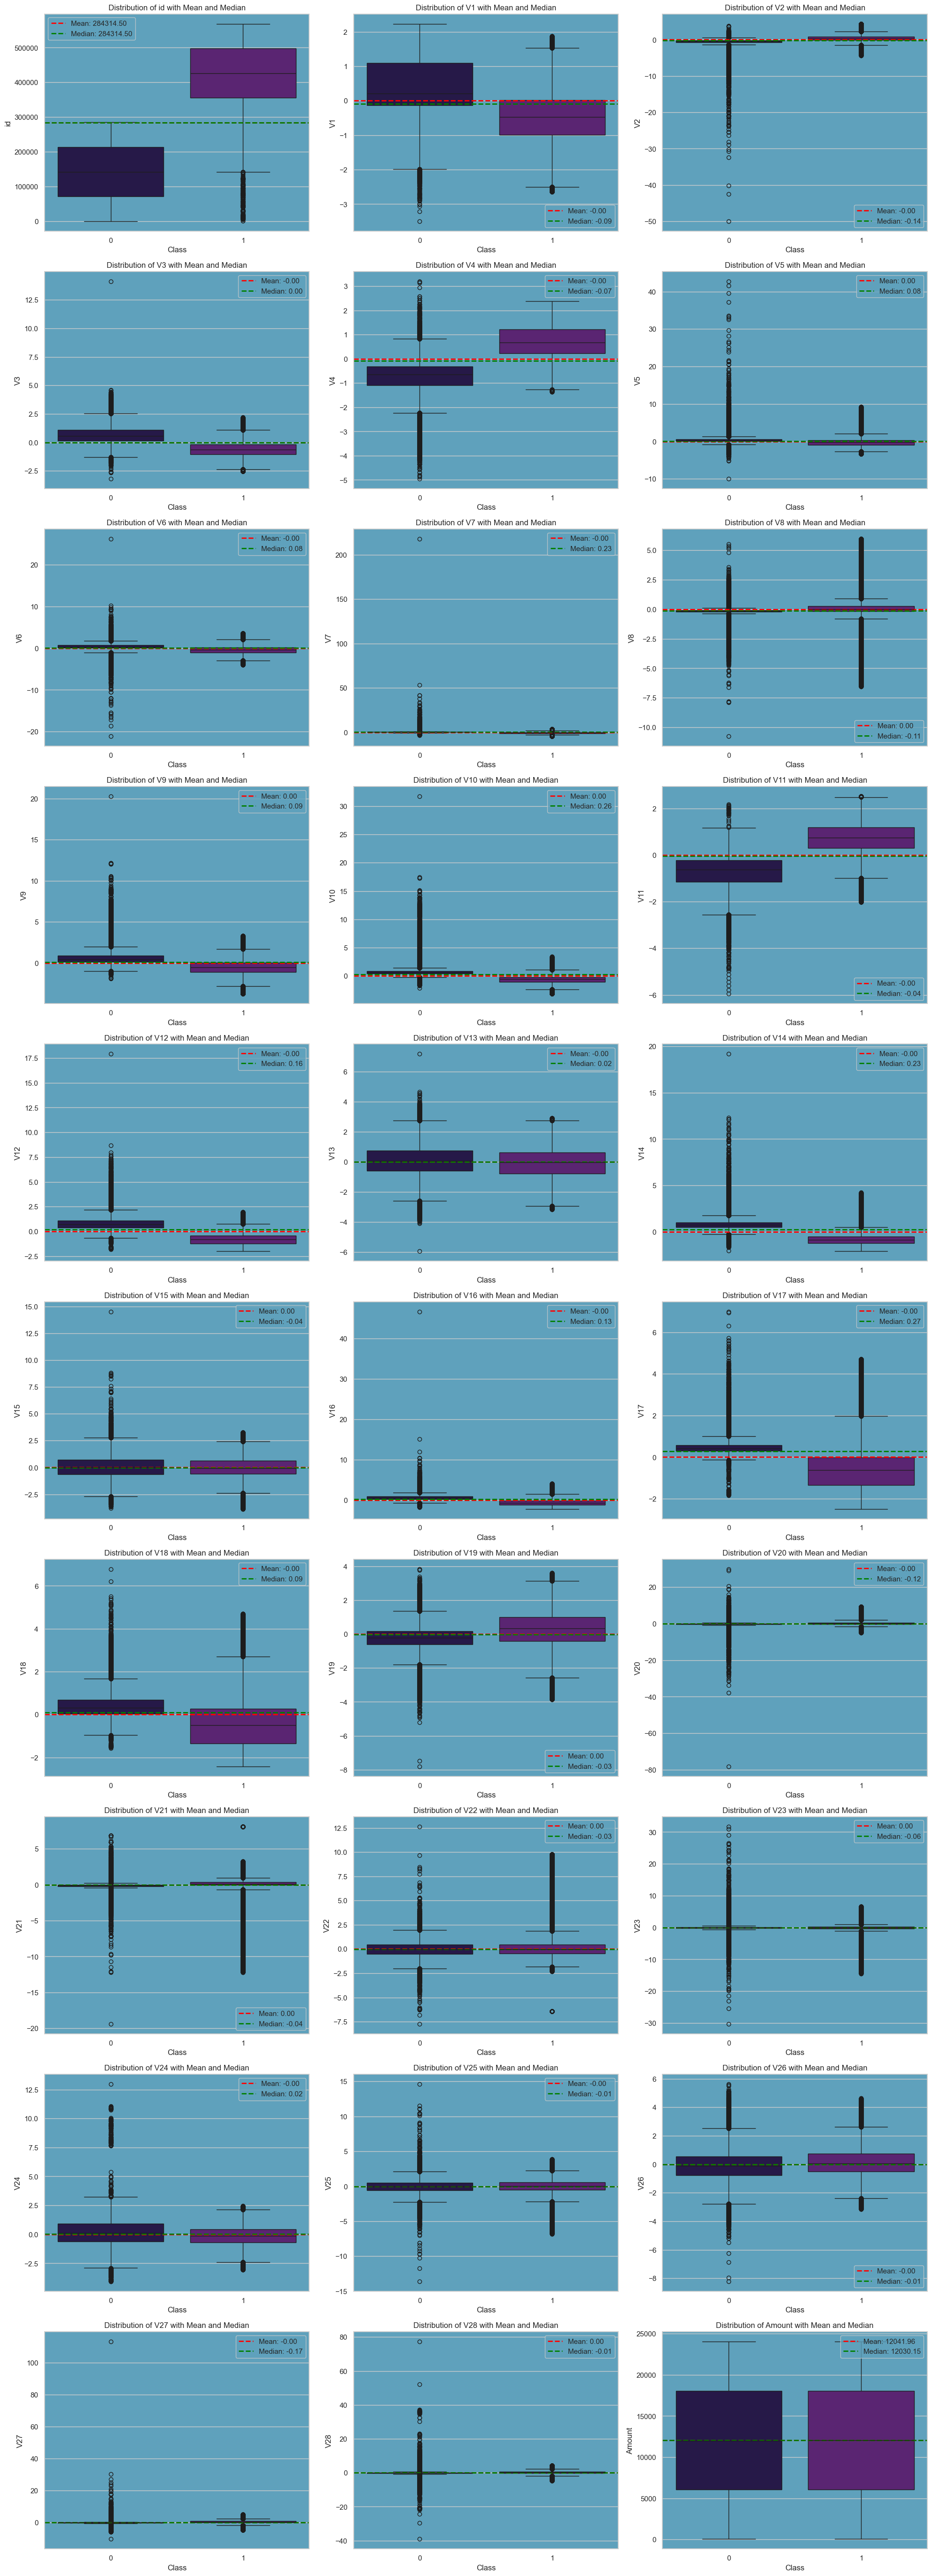

In [25]:
# Fonction qui crée des sous-graphiques en boxplot pour afficher la distribution des colonnes d'un DataFrame en fonction d'une variable catégorielle (hue)
def create_boxplot_subplots(df, columns, hue, theme_style, theme_rc, palette, figsize=(15, 10)):
    # Configuration du thème graphique avec le style et les paramètres personnalisés
    sns.set_theme(style=theme_style, rc=theme_rc)
    
    # Calcul du nombre de colonnes à afficher
    num_columns = len(columns)
    # Calcul du nombre de lignes nécessaires pour les sous-graphiques, avec 3 colonnes par ligne
    num_rows = (num_columns + 2) // 3  # Le +2 garantit qu'on arrondit correctement vers le haut

    # Création de la figure et des axes pour les sous-graphiques avec la taille donnée
    fig, axes = plt.subplots(num_rows, 3, figsize=figsize)
    axes = axes.flatten()  # Aplatit les axes dans une liste pour un accès facile
    
    plot_index = 0  # Indice pour suivre quel graphique est en cours de création
    # Boucle à travers chaque colonne spécifiée
    for col in columns:
        # Si la colonne est la même que la colonne hue, on la saute
        if col == hue:
            continue

        # Création d'un boxplot pour la colonne courante avec la variable hue sur l'axe x
        sns.boxplot(data=df, x=hue, y=col, palette=palette, ax=axes[plot_index])
        
        # Calcul de la moyenne et de la médiane pour la colonne actuelle
        mean_value = df[col].mean()
        median_value = df[col].median()
        
        # Ajout d'une ligne horizontale indiquant la moyenne
        axes[plot_index].axhline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
        # Ajout d'une ligne horizontale indiquant la médiane
        axes[plot_index].axhline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
        
        # Définition du titre, des labels des axes et affichage de la légende pour le graphique courant
        axes[plot_index].set_title(f'Distribution of {col} with Mean and Median')
        axes[plot_index].set_xlabel(hue)  # Label de l'axe x
        axes[plot_index].set_ylabel(col)   # Label de l'axe y
        axes[plot_index].legend()
        
        # Incrémentation de l'indice de graphique
        plot_index += 1
    
    # Suppression des axes supplémentaires s'ils ne sont pas utilisés (cas où le nombre de colonnes n'est pas un multiple de 3)
    for j in range(plot_index, len(axes)):
        fig.delaxes(axes[j])  # Supprime les axes inutilisés
    
    # Ajustement de la mise en page pour éviter les chevauchements
    plt.tight_layout()
    # Affichage de la figure complète avec tous les sous-graphiques
    plt.show()

# Exemple d'utilisation
columns = df_tr.columns.to_list()  # Récupération de la liste des colonnes du DataFrame
palette = sns.color_palette("magma")  # Définition d'une palette de couleurs spécifique

# Création des sous-graphiques en boxplot pour le DataFrame 'df_tr', en utilisant 'Class' comme hue
create_boxplot_subplots(df=df_tr, columns=columns, hue='Class', 
                        theme_style='whitegrid', theme_rc={"axes.facecolor": "#5fa1bc"}, 
                        palette=palette, figsize=(20, 60))


Explications :
1. create_subplots : Cette fonction génère plusieurs sous-graphiques (histogrammes) pour visualiser la distribution de différentes colonnes d'un DataFrame en fonction d'une variable catégorielle (par exemple, la variable Class utilisée comme hue).

2. Thème et style : La fonction utilise Seaborn pour configurer le thème graphique avec des paramètres personnalisés, comme le style du graphique (theme_style) et certaines options pour le rendu graphique (theme_rc).

3. Sous-graphiques :
        x La fonction crée un certain nombre de sous-graphiques en fonction du nombre de colonnes spécifiées, avec 3 colonnes de graphiques par ligne.
        x Chaque sous-graphe représente la distribution d'une colonne du DataFrame, avec la superposition des moyennes et médianes sous forme de lignes verticales rouges et vertes.

4. Moyenne et médiane :
        x Pour chaque graphique, une ligne verticale en pointillé est tracée pour représenter la moyenne et la médiane de la colonne analysée, permettant de visualiser facilement ces valeurs.

5. Suppression des axes inutilisés : Si le nombre de colonnes n'est pas un multiple exact de 3, certains sous-graphiques restent vides. La fonction supprime ces axes inutilisés pour une meilleure présentation.

6. Affichage final : Après avoir généré tous les sous-graphiques, la fonction ajuste la mise en page et affiche la figure complète avec tous les graphiques.

Cela permet de visualiser rapidement les distributions des différentes variables du dataset en fonction d'une catégorie (hue).

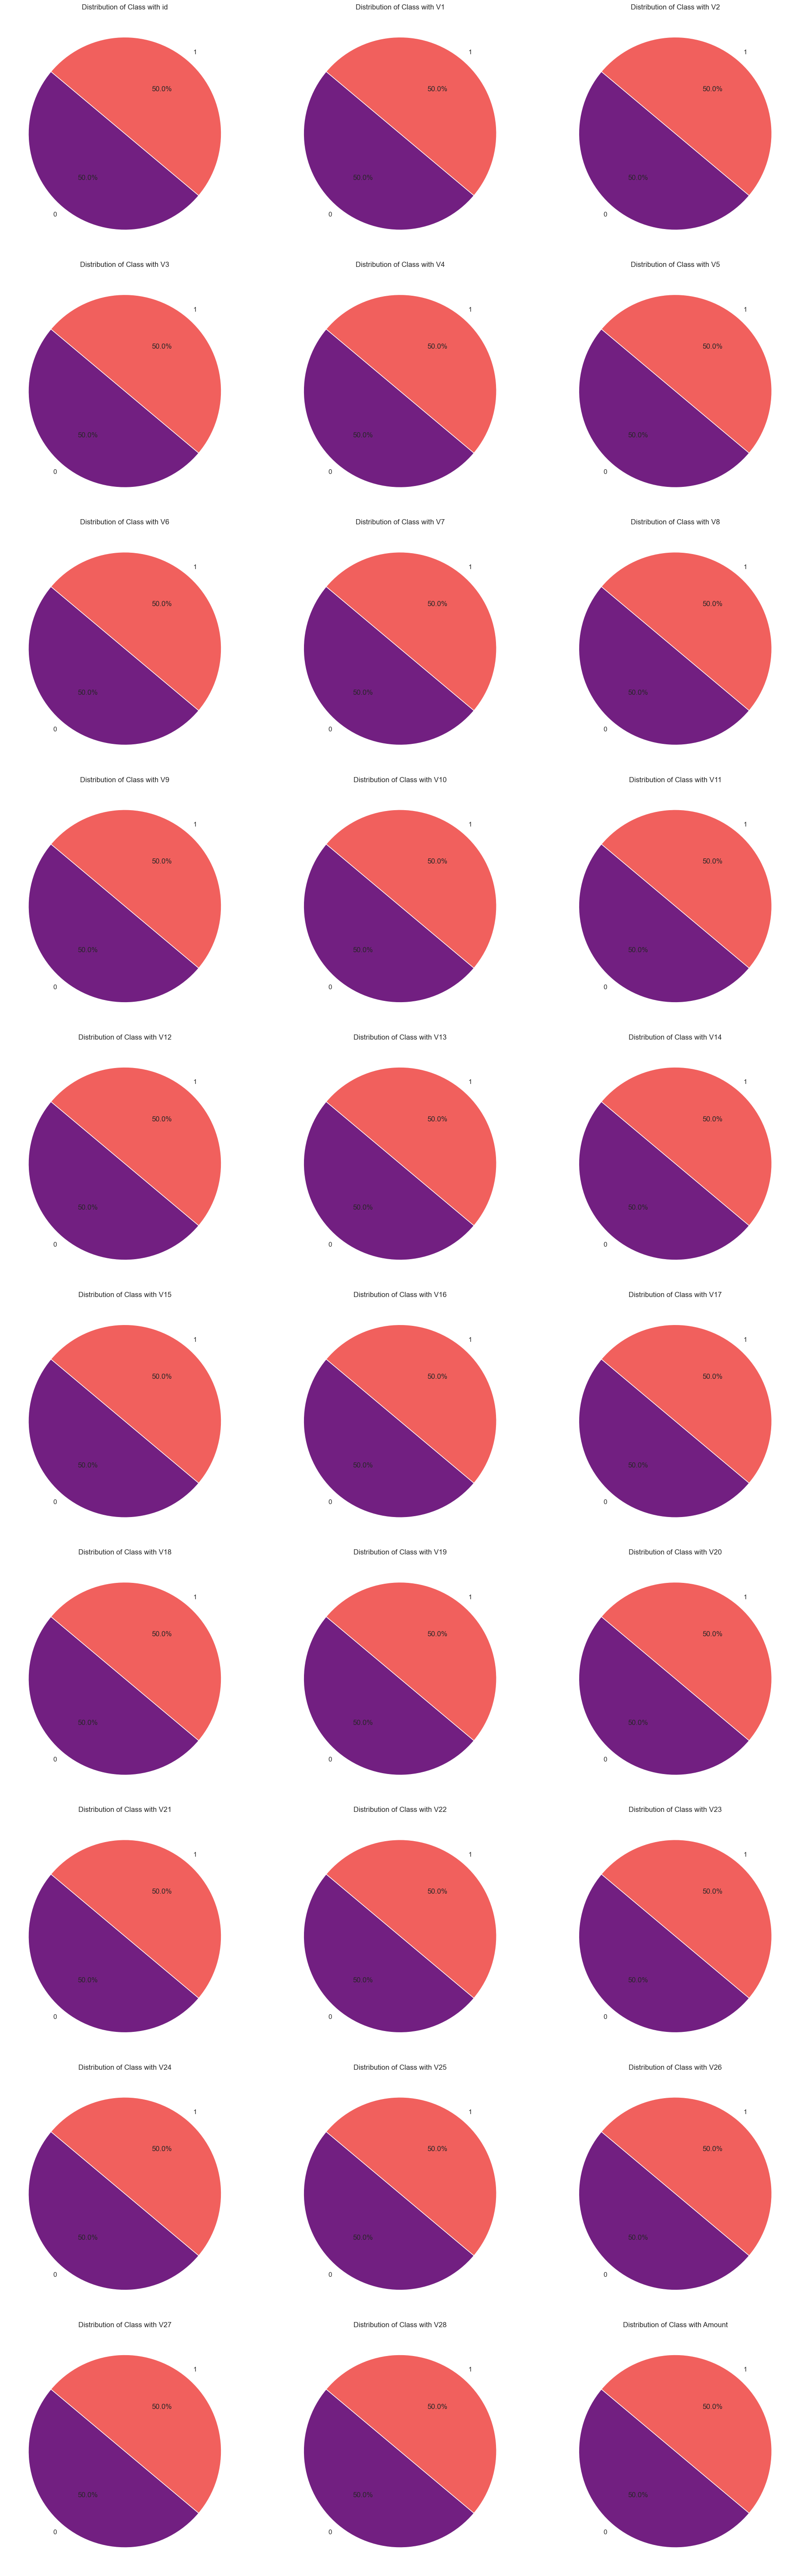

In [26]:
# Fonction qui crée des sous-graphiques en diagramme circulaire (pie chart) pour afficher la distribution d'une variable catégorielle (hue)
def create_piechart_subplots(df, columns, hue, theme_style, theme_rc, figsize=(15, 10)):
    # Configuration du thème graphique avec le style et les paramètres personnalisés
    sns.set_theme(style=theme_style, rc=theme_rc)
    
    # Calcul du nombre de colonnes à afficher, excluant la colonne 'hue'
    num_columns = len(columns) - 1  # On soustrait 1 pour exclure la colonne 'hue'
    # Calcul du nombre de lignes nécessaires pour les sous-graphiques, avec 3 colonnes par ligne
    num_rows = (num_columns + 2) // 3  # Le +2 garantit qu'on arrondit correctement vers le haut

    # Création de la figure et des axes pour les sous-graphiques avec la taille donnée
    fig, axes = plt.subplots(num_rows, 3, figsize=figsize)
    axes = axes.flatten()  # Aplatit les axes dans une liste pour un accès facile
    
    plot_index = 0  # Indice pour suivre quel graphique est en cours de création
    # Boucle à travers chaque colonne spécifiée
    for col in columns:
        # Si la colonne est la même que la colonne hue, on la saute
        if col == hue:
            continue

        # Compter les occurrences de chaque classe dans la colonne 'hue'
        class_counts = df[hue].value_counts()

        # Création du diagramme circulaire (pie chart) pour la colonne actuelle
        axes[plot_index].pie(class_counts, 
                             labels=class_counts.index, 
                             autopct='%1.1f%%',  # Affichage des pourcentages sur le graphique
                             startangle=140,  # Angle de démarrage pour le premier secteur
                             colors=sns.color_palette("magma", len(class_counts)))  # Palette de couleurs
        # Définition du titre du sous-graphique
        axes[plot_index].set_title(f'Distribution of {hue} with {col}')
        # Incrémentation de l'indice de graphique
        plot_index += 1
    
    # Suppression des axes supplémentaires s'ils ne sont pas utilisés (cas où le nombre de colonnes n'est pas un multiple de 3)
    for j in range(plot_index, len(axes)):
        fig.delaxes(axes[j])  # Supprime les axes inutilisés
    
    # Ajustement de la mise en page pour éviter les chevauchements
    plt.tight_layout()
    # Affichage de la figure complète avec tous les sous-graphiques
    plt.show()

# Exemple d'utilisation
columns = df_tr.columns.to_list()  # Récupération de la liste des colonnes du DataFrame
hue = columns[-1]  # Supposons que la dernière colonne est celle qui représente la variable catégorielle (hue)

# Création des sous-graphiques en pie chart pour le DataFrame 'df_tr', en utilisant la dernière colonne comme hue
create_piechart_subplots(df=df_tr, columns=columns, hue=hue, 
                         theme_style='whitegrid', theme_rc={"axes.facecolor": "#5fa1bc"}, 
                         figsize=(20, 60))


Explications :

1. create_piechart_subplots : Cette fonction crée plusieurs sous-graphiques sous forme de diagrammes circulaires (pie charts) pour visualiser la répartition d'une variable catégorielle (hue) par rapport aux autres colonnes.

2. Thème et style :
        x Le thème graphique est configuré via Seaborn pour un style spécifique (theme_style) et certains paramètres personnalisés pour l'apparence des axes (theme_rc).

3. Sous-graphiques :
        x La fonction crée une grille de sous-graphiques avec un maximum de 3 colonnes par ligne. Le nombre de lignes est calculé en fonction du nombre total de colonnes.
        x Chaque sous-graphique représente un diagramme circulaire montrant la répartition de la variable hue.

4. Comptage des classes :
        x Pour chaque sous-graphique, la fonction compte les occurrences des différentes classes dans la colonne hue (variable catégorielle).
        x Ensuite, elle génère un diagramme circulaire, avec des secteurs correspondant aux différentes catégories, et les pourcentages affichés pour chaque secteur.

5. Suppression des axes inutilisés : Comme pour les autres fonctions, si le nombre de colonnes n'est pas un multiple de 3, certains axes peuvent rester vides. Ces axes sont supprimés pour rendre la visualisation plus propre.

6. Affichage final : Après avoir généré tous les sous-graphiques, la fonction ajuste la mise en page pour éviter les chevauchements et affiche la figure complète.

Cette fonction est idéale pour visualiser la répartition d'une variable catégorielle à travers plusieurs sous-graphes et peut être utilisée pour rapidement explorer la composition d'un jeu de données.

In [7]:
# Séparation des données en caractéristiques (X) et cible (y)
X = df_tr.drop('Class', axis=1)
y = df_tr['Class']

1. df_tr.drop('Class', axis=1) :
        La méthode .drop() permet de supprimer une colonne spécifique du DataFrame.
        Ici, la colonne 'Class' (la variable cible) est supprimée du DataFrame df_tr pour créer l'ensemble des caractéristiques X.
        Le paramètre axis=1 indique que l'on supprime une colonne (et non une ligne).
        Résultat : X contient toutes les colonnes de df_tr à l'exception de la colonne 'Class'.

2. df_tr['Class'] :
        Ce code extrait uniquement la colonne 'Class' de df_tr, qui est assignée à la variable y, représentant la variable cible.
        Résultat : y contient les valeurs de la colonne 'Class', c'est-à-dire la variable que le modèle tentera de prédire.

En résumé :

> X : Contient toutes les colonnes de caractéristiques (features) à partir desquelles le modèle apprendra (toutes les colonnes sauf 'Class').<br>
> y : Contient la colonne 'Class', qui est la cible que l'on cherche à prédire (par exemple, pour un problème de classification binaire).

Ce processus est typique dans les tâches de machine learning, où on sépare les caractéristiques des étiquettes (target) avant d'entraîner un modèle.

In [8]:
# Définir les caractéristiques numériques (exclure les colonnes catégorielles)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

1. X.select_dtypes(include=['int64', 'float64']) :
        La méthode select_dtypes() permet de sélectionner uniquement les colonnes d'un certain type dans un DataFrame.
        Ici, le paramètre include=['int64', 'float64'] indique que seules les colonnes de type entier (int64) et flottant (float64) seront sélectionnées.
        Cela permet d'exclure automatiquement toutes les colonnes contenant des données catégorielles ou d'autres types non numériques, comme des chaînes de caractères (object) ou des booléens.

2. .columns.tolist() :
        La propriété .columns récupère les noms des colonnes sélectionnées dans le DataFrame.
        La méthode .tolist() convertit cette liste d'objets Index en une liste Python standard.

3. numeric_features :
        La variable numeric_features contiendra donc la liste des noms de toutes les colonnes numériques (entiers et flottants) dans X.

En résumé :

> numeric_features : Contient une liste des noms des colonnes numériques, ce qui permet ensuite de se concentrer uniquement sur ces colonnes pour des tâches telles que la normalisation, la création de modèles, ou la transformation de données. C'est une étape essentielle dans le traitement des données pour les algorithmes de machine learning qui nécessitent des entrées numériques.

In [9]:
# Définir le pipeline de transformation pour les colonnes numériques
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

Pipeline :

> Un pipeline est une séquence d'étapes appliquées aux données, chacune représentant une transformation.

> Ici, il s'agit de définir un pipeline pour les caractéristiques numériques.

steps=[('scaler', StandardScaler())] :

> StandardScaler() est un transformateur qui normalise les données en les centrant sur la moyenne 0 et en les réduisant à une échelle unitaire (écart-type 1). Cela est souvent nécessaire avant de passer à des algorithmes d'apprentissage automatique, car certains modèles sont sensibles à l'échelle des données (par exemple, les modèles basés sur la distance comme la régression logistique, SVM, etc.).
> Le pipeline comporte une étape unique ici : la normalisation des colonnes numériques avec le StandardScaler.

In [27]:
# Définir la transformation par colonnes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

ColumnTransformer :

> Il permet d'appliquer des transformations spécifiques à des sous-ensembles de colonnes d'un DataFrame. Cela est utile quand il y a un mélange de colonnes numériques et catégorielles nécessitant des prétraitements différents.

transformers=[...] :

> Ici, on spécifie que l'on veut appliquer des transformations aux colonnes numériques.

> ('num', numeric_transformer, numeric_features) :
>> 'num' : C'est une étiquette de nommage arbitraire pour cette transformation (utile pour identifier les étapes).
>> numeric_transformer : Le pipeline défini précédemment qui contient l'étape de mise à l'échelle des données numériques.
>> numeric_features : La liste des colonnes numériques sur lesquelles on applique cette transformation (sélectionnées plus tôt avec select_dtypes).

In [28]:
# Définir le modèle
model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', CatBoostClassifier(verbose=False))])

    Pipeline pour le modèle :

    Pipeline :
        Le Pipeline permet de chaîner plusieurs étapes, de sorte que les données passent successivement par chaque étape avant d'atteindre le modèle de classification.
        Il permet d'automatiser le processus complet de prétraitement et de modélisation en un seul objet. Ainsi, vous pouvez appliquer toutes les étapes en une seule ligne lorsque vous entraînez ou testez le modèle.

    steps=[...] :

        Le pipeline est composé de plusieurs étapes successives définies sous forme de tuples (nom_étape, objet_étape).

        Étape 1 : 'preprocessor', preprocessor :
            'preprocessor' : C'est le nom de l'étape pour appliquer le prétraitement défini précédemment.
            preprocessor : C'est l'objet ColumnTransformer que nous avons défini plus tôt, qui applique des transformations spécifiques (comme la normalisation des colonnes numériques) sur les données d'entrée.

        Étape 2 : 'classifier', CatBoostClassifier(verbose=False) :
            'classifier' : C'est le nom de l'étape pour l'entraînement du modèle de classification.
            CatBoostClassifier(verbose=False) :
                Il s'agit d'un classificateur basé sur CatBoost, un puissant algorithme d'apprentissage automatique supervisé qui fonctionne bien sur les données catégorielles et numériques.
                verbose=False : Cela désactive l'affichage des logs détaillés de CatBoost pendant l'entraînement, pour rendre le processus moins verbeux.

Pourquoi utiliser un Pipeline ?

    Simplification :
        Au lieu d'appliquer séparément le prétraitement et le modèle, toutes les étapes sont définies dans un seul objet. Cela rend le processus d'entraînement et d'évaluation du modèle beaucoup plus simple.

    Sécurisation :
        Le pipeline garantit que les étapes de prétraitement seront appliquées chaque fois que le modèle sera entraîné ou évalué, évitant ainsi des erreurs où l'on pourrait oublier d'appliquer le prétraitement.

    Facilité d'évaluation :
        En encapsulant tout dans un pipeline, il devient facile d'évaluer le modèle avec des méthodes comme cross_val_score ou GridSearchCV, car ces méthodes n'ont pas à se soucier des étapes intermédiaires (elles n'ont qu'à appeler le pipeline entier).

En résumé :

    model est un pipeline qui applique d'abord le prétraitement des données via l'objet preprocessor, puis entraîne un modèle de classification avec l'algorithme CatBoostClassifier.
    Cela permet de structurer facilement un flux complet de machine learning allant de la préparation des données jusqu'à la prédiction finale, tout en automatisant l'enchaînement des étapes.

In [29]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    train_test_split :
        Cette fonction provient de la bibliothèque sklearn.model_selection et est utilisée pour diviser les données en deux ensembles distincts : un pour l'entraînement du modèle et un autre pour le test du modèle.
        Cela permet d'évaluer la performance du modèle sur des données qu'il n'a pas vues pendant l'entraînement, assurant ainsi que le modèle ne soit pas simplement surajusté (overfitted) aux données d'entraînement.

    Paramètres de train_test_split :
        X : C'est le DataFrame contenant les caractéristiques (features) d'entrée.
        y : C'est la série contenant la variable cible (target) à prédire.
        test_size=0.2 :
            Ce paramètre spécifie la proportion de l'ensemble de données qui doit être utilisée comme ensemble de test.
            Ici, 20% des données seront utilisées pour le test, tandis que les 80% restants seront utilisés pour l'entraînement.
        random_state=42 :
            Ce paramètre fixe le graine aléatoire pour la génération de nombres aléatoires. Cela permet d'obtenir des résultats reproductibles.
            En utilisant une valeur fixe (comme 42 ici), chaque fois que vous exécuterez ce code, vous obtiendrez la même division entre les ensembles d'entraînement et de test.

    Variables résultantes :
        X_train : Contient les caractéristiques des données d'entraînement.
        X_test : Contient les caractéristiques des données de test.
        y_train : Contient les étiquettes (cibles) des données d'entraînement.
        y_test : Contient les étiquettes (cibles) des données de test.

En résumé :

    Ce code divise l'ensemble de données en deux parties : 80% pour l'entraînement et 20% pour le test.
    Cela est essentiel pour évaluer correctement les performances d'un modèle de machine learning, en s'assurant que les évaluations de performance (précision, rappel, etc.) ne soient pas biaisées par l'utilisation des mêmes données pour l'entraînement et le test.

In [12]:
# Entraîner le modèle
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['id', 'V1', 'V2', 'V3', 'V4',
                                                   'V5', 'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28',
                                                   'Amount'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000001C4C037FF70>)])

    model.fit(...) :
        La méthode fit() est utilisée pour entraîner le modèle sur les données d'entraînement.
        Cela implique que le modèle va apprendre à partir des caractéristiques (X_train) et des étiquettes cibles (y_train) fournies.

    Données d'entraînement :
        X_train : Contient les caractéristiques (features) d'entrée qui seront utilisées pour prédire les cibles. Chaque ligne représente un exemple d'entraînement, et chaque colonne représente une caractéristique.
        y_train : Contient les étiquettes (targets) correspondantes pour chaque exemple d'entraînement dans X_train. Cela signifie que pour chaque ensemble de caractéristiques dans X_train, il y a une étiquette correspondante dans y_train que le modèle doit apprendre à prédire.

Que se passe-t-il lors de l'exécution de fit() ?

    Apprentissage : Le modèle (dans ce cas, un CatBoostClassifier) va parcourir les données d'entraînement, analyser les relations entre les caractéristiques et les cibles, et ajuster ses paramètres internes en conséquence.
    Optimisation : Le modèle utilise des algorithmes d'optimisation pour minimiser la fonction de perte, qui quantifie à quel point les prédictions du modèle s'écartent des valeurs réelles de y_train.
    Stockage des paramètres : Après l'entraînement, le modèle mémorise les informations nécessaires pour faire des prédictions sur de nouvelles données.

Importance de cette étape

    Entraînement du modèle : C'est une étape essentielle dans le processus de machine learning, car c'est à ce moment-là que le modèle apprend à partir des données.
    Préparation pour la prédiction : Une fois le modèle entraîné, il peut être utilisé pour faire des prédictions sur des données non vues (comme celles dans X_test) en utilisant la méthode predict().

En résumé :

    Ce code entraîne le modèle défini précédemment en utilisant les données d'entraînement.
    Une fois cette étape terminée, le modèle est prêt à faire des prédictions sur de nouvelles données en fonction des relations qu'il a apprises lors de l'entraînement.

In [13]:
# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)



    model.predict(...) :
        La méthode predict() est utilisée pour générer des prédictions basées sur les caractéristiques de l'ensemble de test.
        Elle prend en entrée X_test, qui contient les caractéristiques des exemples de test que le modèle n'a jamais vus auparavant.

    Données de test :
        X_test : Contient les caractéristiques des données qui seront utilisées pour évaluer la performance du modèle. Chaque ligne dans X_test représente un exemple sur lequel le modèle doit faire des prédictions.

    Résultats des prédictions :
        y_pred : C'est un tableau ou une série qui contient les prédictions du modèle pour chaque exemple de test. Chaque valeur dans y_pred correspond à la classe ou la valeur prédite pour l'exemple de test correspondant dans X_test.

Que se passe-t-il lors de l'exécution de predict() ?

    Génération des prédictions : Le modèle utilise les paramètres qu'il a appris lors de l'entraînement pour prédire la cible (classe ou valeur) de chaque exemple dans X_test.
    Utilisation des caractéristiques : Pour chaque exemple dans X_test, le modèle applique les relations qu'il a apprises entre les caractéristiques et la variable cible.

Importance de cette étape

    Évaluation des performances : Les prédictions effectuées sur l'ensemble de test (stockées dans y_pred) sont essentielles pour évaluer la performance du modèle en les comparant aux vraies valeurs de cibles correspondantes dans y_test.
    Vérification de l'efficacité : Cela permet d'analyser la capacité du modèle à généraliser et à faire des prédictions sur des données qu'il n'a pas vues, ce qui est crucial pour comprendre sa performance dans des scénarios réels.

En résumé :

    Ce code génère des prédictions pour l'ensemble de test en utilisant le modèle de machine learning déjà entraîné.
    Les résultats sont stockés dans y_pred, ce qui permettra de les comparer aux vraies cibles pour évaluer la précision et l'efficacité du modèle.

In [30]:
# Calculer l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9996570705027874


    accuracy_score(...) :
        accuracy_score est une fonction provenant de la bibliothèque sklearn.metrics. Elle est utilisée pour évaluer la performance du modèle en calculant l'exactitude des prédictions.
        La fonction prend deux arguments :
            y_test : Ce sont les vraies valeurs de la cible pour l'ensemble de test.
            y_pred : Ce sont les valeurs prédites par le modèle sur le même ensemble de test.

    Calcul de l'exactitude :
        L'exactitude est définie comme le rapport du nombre de prédictions correctes au nombre total de prédictions effectuées. Elle peut être calculée comme suit :
    Accuracy=Nombre de preˊdictions correctesNombre total de preˊdictions
    Accuracy=Nombre total de preˊdictionsNombre de preˊdictions correctes​
        Une exactitude de 1 (ou 100%) signifie que toutes les prédictions étaient correctes, tandis qu'une exactitude de 0 signifie que le modèle n'a fait aucune prédiction correcte.

    Stockage du résultat :
        accuracy : Cette variable stocke la valeur de l'exactitude calculée, qui peut ensuite être utilisée pour des analyses ou des comparaisons ultérieures.

    Affichage du résultat :
        print("Accuracy:", accuracy) : Cela affiche la valeur de l'exactitude dans la console. Le texte "Accuracy:" est suivi de la valeur de l'exactitude calculée.

Importance de cette étape

    Évaluation de la performance : L'exactitude est une métrique couramment utilisée pour évaluer les modèles de classification. Elle fournit une indication générale de la performance du modèle.
    Comparaison de modèles : L'exactitude permet de comparer la performance de différents modèles ou configurations de modèles afin de sélectionner celui qui donne les meilleurs résultats.
    Limites : Bien que l'exactitude soit une mesure utile, elle peut parfois être trompeuse, surtout dans des ensembles de données déséquilibrés (où certaines classes sont beaucoup plus fréquentes que d'autres). Dans ces cas, d'autres métriques comme la précision, le rappel ou le score F1 peuvent être plus informatives.

En résumé :

    Ce code calcule l'exactitude du modèle sur l'ensemble de test en comparant les valeurs prédites aux vraies valeurs.
    Le résultat est stocké dans la variable accuracy et est ensuite affiché à l'utilisateur, ce qui fournit une mesure directe de la performance du modèle

In [31]:
# Afficher le rapport de classification avec couleurs et en-tête
from colorama import Fore, Back, Style
print("\n" + Back.BLUE + Fore.WHITE + "Classification Report" + Style.RESET_ALL)
report = classification_report(y_test, y_pred, output_dict=True)
for key, value in report.items():
    if key in ['0', '1']:  
        color = Fore.GREEN if value['precision'] > 0.8 else Fore.RED
        print(f"Class {key}:")
        print(f"  Precision: {color}{value['precision']:.2f}{Style.RESET_ALL}")
        color = Fore.GREEN if value['recall'] > 0.8 else Fore.RED
        print(f"  Recall: {color}{value['recall']:.2f}{Style.RESET_ALL}")
        color = Fore.GREEN if value['f1-score'] > 0.8 else Fore.RED
        print(f"  F1-score: {color}{value['f1-score']:.2f}{Style.RESET_ALL}")
        print(f"  Support: {value['support']}")
    else:
        print(key + ":", value)


Classification Report
Class 0:
  Precision: 1.00
  Recall: 1.00
  F1-score: 1.00
  Support: 56750.0
Class 1:
  Precision: 1.00
  Recall: 1.00
  F1-score: 1.00
  Support: 56976.0
accuracy: 0.9996570705027874
macro avg: {'precision': 0.9996569545708367, 'recall': 0.9996571914660413, 'f1-score': 0.9996570692311153, 'support': 113726.0}
weighted avg: {'precision': 0.999657078158671, 'recall': 0.9996570705027874, 'f1-score': 0.9996570705434346, 'support': 113726.0}


    Importation des modules :
        from colorama import Fore, Back, Style : La bibliothèque colorama est utilisée pour ajouter des couleurs et des styles au texte imprimé dans la console.
        Fore : Définit les couleurs de premier plan (texte).
        Back : Définit les couleurs d'arrière-plan.
        Style : Permet de réinitialiser les styles ou de définir des styles spéciaux.

    Affichage de l'en-tête :
        print("\n" + Back.BLUE + Fore.WHITE + "Classification Report" + Style.RESET_ALL) :
            Affiche un en-tête avec un fond bleu et du texte blanc pour indiquer le début du rapport de classification.
            Style.RESET_ALL : Réinitialise le style à la valeur par défaut après l'impression de l'en-tête.

    Génération du rapport de classification :
        report = classification_report(y_test, y_pred, output_dict=True) :
            Cette ligne génère un rapport de classification à l'aide de la fonction classification_report de sklearn.metrics.
            output_dict=True : Cela indique que le rapport doit être renvoyé sous forme de dictionnaire, ce qui facilite l'accès aux métriques pour chaque classe.

    Affichage des résultats par classe :
        La boucle for key, value in report.items(): parcourt chaque élément du rapport.
        Conditions pour les classes :
            if key in ['0', '1']: : Cela vérifie si la clé représente une classe spécifique. Ici, les classes '0' et '1' sont traitées pour afficher des statistiques détaillées.

    Mise en forme colorée :
        Pour chaque métrique (précision, rappel, score F1), la couleur du texte est définie en fonction de la valeur de la métrique :
            Précision : Si elle est supérieure à 0.8, la couleur est verte ; sinon, elle est rouge.
            Rappel : Même logique que pour la précision.
            F1-score : Même logique que pour la précision et le rappel.
        Chaque métrique est imprimée avec sa valeur formatée à deux décimales.

    Affichage du support :
        print(f" Support: {value['support']}") : Affiche le nombre d'exemples pour chaque classe.

    Autres clés :
        Si la clé ne correspond pas aux classes '0' ou '1', elle est simplement imprimée avec sa valeur.

Importance de cette étape

    Évaluation détaillée : Le rapport de classification fournit des mesures clés pour chaque classe, ce qui permet d'évaluer la performance du modèle de manière détaillée.
    Analyse visuelle : L'utilisation de couleurs rend les résultats plus faciles à interpréter et à comprendre rapidement.
    Identification des classes problématiques : Les métriques comme la précision et le rappel permettent d'identifier les classes pour lesquelles le modèle pourrait avoir des difficultés, ce qui peut guider des ajustements futurs.

En résumé :

    Ce code génère et affiche un rapport de classification détaillé pour le modèle.
    Les métriques de performance sont présentées avec une mise en forme colorée pour faciliter l'analyse, permettant une évaluation rapide et efficace de la performance du modèle sur chaque classe.